## Michael's hypothesis 

Michael: gBGC may occur in regions that are GC-poor, in addition to regions that are GC-rich. The expected impact upon Chen performance will differ in either case. Therefore repeat analyses, this time stratifying by GC content. 


In [1]:
CONSTRAINT_TOOLS = '/scratch/ucgd/lustre-work/quinlan/u6018199/constraint-tools'
CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'

import sys
sys.path.append(f'{CONSTRAINT_TOOLS}/utilities')

GC_WINDOW_SIZE = 1000

In [2]:
import pandas as pd

def get_windows_with_GC_content(): 
  df1 = pd.read_csv(
    f'{CONSTRAINT_TOOLS_DATA}/chen-et-al-2023-published-version/41586_2023_6045_MOESM4_ESM/Supplementary_Data_2.gnocchi.N_expected.N_observed.B.paternal_recombination_rate.maternal_recombination_rate.gBGC-tract-counts.non-exonic.gBGC.bed', 
    sep='\t', 
  )

  df2 = pd.read_csv(
    f'{CONSTRAINT_TOOLS_DATA}/chen-et-al-2023-published-version/41586_2023_6045_MOESM4_ESM/Supplementary_Data_2.GC_content_{GC_WINDOW_SIZE}.bed', 
    sep='\t', 
  )
  df2 = df2[['chen_chrom', 'chen_start', 'chen_end', 'window_GC_content']]
  df2 = df2.rename(columns={
    'chen_chrom': 'chrom', 
    'chen_start': 'start', 
    'chen_end': 'end',
    'window_GC_content': f'GC_content_{GC_WINDOW_SIZE}bp'
  })

  df = pd.merge(
    df1, 
    df2, 
    on=['chrom', 'start', 'end'], 
    how='inner'
  )
  return df

WINDOWS = get_windows_with_GC_content()
WINDOWS

,chrom,start,end,gnocchi,N_expected,N_observed,window overlaps enhancer,window overlaps merged_exon,B,paternal_recombination_rate,maternal_recombination_rate,gBGC-tract_overlap_count,log10_paternal_recombination_rate,log10_maternal_recombination_rate,B_M1star.EUR,B0_M3starHMT6.EUR,B1_M3starHMT6.EUR,Bmean_M3starHMT6.EUR,lambda_M3starHMT6.EUR,GC_content_1000bp
0,chr1,1432000,1433000,4.299894,338.059552,259,True,False,0.653,0.039046,0.025852,0,-1.408422,-1.587499,0.108103,0.057741,0.513191,0.105518,2.585568,0.661339
1,chr1,1451000,1452000,0.666316,302.590657,291,False,False,0.652,0.039046,0.025852,0,-1.408422,-1.587499,0.108103,0.057741,0.513191,0.105518,2.585568,0.556444
2,chr1,1453000,1454000,0.828398,269.601925,256,False,False,0.651,0.039046,0.025852,0,-1.408422,-1.587499,0.108103,0.057741,0.513191,0.105518,2.585568,0.537463
3,chr1,1458000,1459000,-0.086128,270.583243,272,False,False,0.651,0.039046,0.025852,0,-1.408422,-1.587499,0.108103,0.057741,0.513191,0.105518,2.585568,0.532468
4,chr1,1463000,1464000,2.948188,236.321790,191,True,False,0.651,0.039046,0.025852,0,-1.408422,-1.587499,0.108103,0.057741,0.513191,0.105518,2.585568,0.540460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019237,chr9,137262000,137263000,-2.396149,263.131293,302,True,False,0.536,0.057053,0.063434,0,-1.243724,-1.197675,0.165515,0.135944,3.636507,0.219258,2.281162,0.500499
1019238,chr9,137268000,137269000,3.640544,272.046527,212,True,False,0.536,0.057053,0.063434,0,-1.243724,-1.197675,0.165515,0.135944,3.636507,0.219258,2.281162,0.552448
1019239,chr9,137269000,137270000,5.276351,300.458958,209,True,False,0.536,0.057053,0.063434,0,-1.243724,-1.197675,0.165515,0.135944,3.636507,0.219258,2.281162,0.519481
1019240,chr9,137275000,137276000,2.687348,339.517045,290,True,False,0.536,1.564889,0.024254,0,0.194484,-1.615221,0.165515,0.135944,3.636507,0.219258,2.281162,0.603397


In [3]:
import matplotlib.pyplot as plt
from aggregate import aggregate
import numpy as np

In [4]:
def get_low_GC_content_windows(df): 
  df = df[df['GC_content_1000bp'] < 0.3]
  return df 

get_low_GC_content_windows(WINDOWS)

,chrom,start,end,gnocchi,N_expected,N_observed,window overlaps enhancer,window overlaps merged_exon,B,paternal_recombination_rate,maternal_recombination_rate,gBGC-tract_overlap_count,log10_paternal_recombination_rate,log10_maternal_recombination_rate,B_M1star.EUR,B0_M3starHMT6.EUR,B1_M3starHMT6.EUR,Bmean_M3starHMT6.EUR,lambda_M3starHMT6.EUR,GC_content_1000bp
234,chr1,2957000,2958000,1.591105,193.110670,171,False,False,0.947,4.397368,0.371706,0,0.643193,-0.429800,0.347981,0.186199,2.705815,0.416240,2.689265,0.285714
504,chr1,4192000,4193000,-2.896167,187.357651,227,False,False,0.979,0.000219,0.000560,0,-3.659791,-3.252134,0.254581,0.086947,1.175320,0.264787,2.151555,0.283716
771,chr1,4812000,4813000,0.310210,184.210294,180,False,False,0.963,0.000015,0.000017,0,-4.826774,-4.759256,0.254581,0.086947,1.175320,0.264787,2.151555,0.269730
773,chr1,4814000,4815000,-0.808550,205.411703,217,False,False,0.963,0.954125,1.223442,0,-0.020395,0.087583,0.254581,0.086947,1.175320,0.264787,2.151555,0.282717
1040,chr1,5320000,5321000,1.540634,216.678112,194,False,False,0.955,1.069330,0.312095,0,0.029112,-0.505713,0.090887,0.029669,0.366459,0.093086,2.419207,0.276723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016653,chr9,126265000,126266000,1.830393,180.598067,156,False,False,0.877,0.303049,0.321494,0,-0.518487,-0.492827,0.841520,0.697367,17.087569,1.839764,2.200926,0.288711
1016820,chr9,126737000,126738000,0.300743,170.931943,167,False,False,0.915,0.269924,0.607743,0,-0.568759,-0.216280,0.841520,0.697367,17.087569,1.839764,2.200926,0.275724
1017708,chr9,130249000,130250000,1.749615,186.920549,163,False,False,0.966,0.009700,0.078932,0,-2.013223,-1.102746,0.747576,0.411318,4.076071,0.890301,2.299056,0.296703
1018854,chr9,135057000,135058000,0.195269,181.631651,179,False,False,0.942,0.008926,0.011036,0,-2.049321,-1.957202,0.349248,0.140218,1.188777,0.376459,2.650222,0.290709


In [13]:
def get_high_GC_content_windows(df): 
  df = df[df['GC_content_1000bp'] > 0.55]
  df = df[df['window overlaps enhancer'] == False]
  return df 

get_high_GC_content_windows(WINDOWS)

,chrom,start,end,gnocchi,N_expected,N_observed,window overlaps enhancer,window overlaps merged_exon,B,paternal_recombination_rate,maternal_recombination_rate,gBGC-tract_overlap_count,log10_paternal_recombination_rate,log10_maternal_recombination_rate,B_M1star.EUR,B0_M3starHMT6.EUR,B1_M3starHMT6.EUR,Bmean_M3starHMT6.EUR,lambda_M3starHMT6.EUR,GC_content_1000bp
1,chr1,1451000,1452000,0.666316,302.590657,291,False,False,0.652,3.904609e-02,2.585239e-02,0,-1.408422,-1.587499,0.108103,0.057741,0.513191,0.105518,2.585568,0.556444
5,chr1,1467000,1468000,2.958469,326.453703,273,False,False,0.651,3.904609e-02,2.585239e-02,0,-1.408422,-1.587499,0.108103,0.057741,0.513191,0.105518,2.585568,0.636364
6,chr1,1476000,1477000,-0.662737,289.719448,301,False,False,0.651,3.904609e-02,2.585239e-02,0,-1.408422,-1.587499,0.108103,0.057741,0.513191,0.105518,2.585568,0.556444
8,chr1,1491000,1492000,-1.635048,279.657172,307,False,False,0.651,3.904609e-02,2.585239e-02,0,-1.408422,-1.587499,0.108103,0.057741,0.513191,0.105518,2.585568,0.553447
10,chr1,1494000,1495000,1.320359,348.654113,324,False,False,0.651,3.904609e-02,2.585239e-02,0,-1.408422,-1.587499,0.108103,0.057741,0.513191,0.105518,2.585568,0.632368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019216,chr9,136987000,136988000,3.462918,276.591979,219,False,False,0.567,5.657954e-07,1.281921e-07,0,-6.247341,-6.892139,0.165515,0.135944,3.636507,0.219258,2.281162,0.572428
1019232,chr9,137136000,137137000,3.277688,316.292417,258,False,False,0.555,1.500946e-01,5.392963e-03,0,-0.823635,-2.268173,0.165515,0.135944,3.636507,0.219258,2.281162,0.631369
1019233,chr9,137137000,137138000,2.779895,302.336307,254,False,False,0.555,1.410229e+01,1.698819e+00,0,1.149290,0.230147,0.165515,0.135944,3.636507,0.219258,2.281162,0.586414
1019234,chr9,137138000,137139000,3.286597,273.337005,219,False,False,0.556,1.500946e-01,5.392963e-03,0,-0.823635,-2.268173,0.165515,0.135944,3.636507,0.219258,2.281162,0.616384


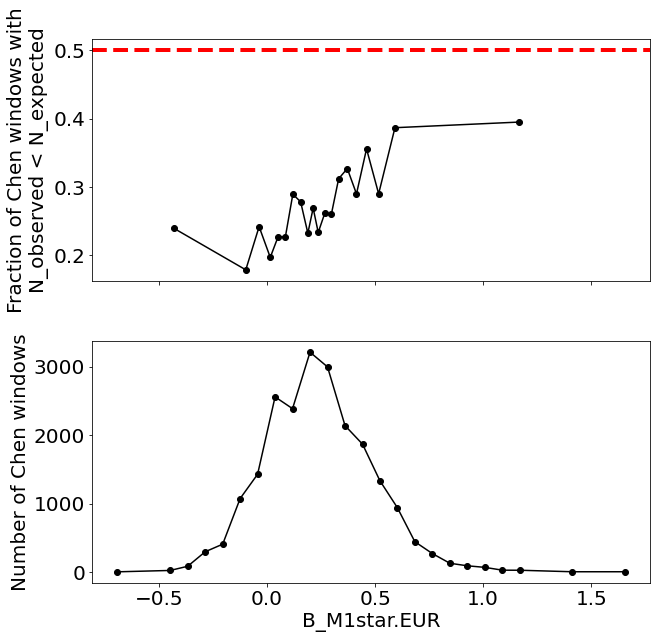

In [14]:
plt.rcParams.update({
  'font.size': 20,
})

def plot_fraction_below_diag(df, feature, number_quantiles=20, number_bins=30, ylim=None):  
  df = df.copy() 

  df = df.dropna(subset=[feature])  

  df[f'{feature}_quantile'] = pd.qcut(df[feature], q=number_quantiles, labels=None, retbins=False)
  df[f'{feature}_bin'] = pd.cut(df[feature], bins=number_bins)

  df[f'{feature}_quantile_mid'] = df[f'{feature}_quantile'].apply(lambda x: x.mid).astype(float)
  df[f'{feature}_bin_mid'] = df[f'{feature}_bin'].apply(lambda x: x.mid).astype(float)

  df['below_diag'] = df['N_observed'] < df['N_expected']

  df_by_quantile = aggregate(
    df, 
    group_columns = [f'{feature}_quantile_mid'],
    aggregation_functions = {
      'below_diag': [np.mean],
    }
  )
  df_by_quantile = df_by_quantile.rename(columns={
    'mean below_diag': 'fraction_below_diag',
  })
  
  df_by_bin = aggregate(
    df, 
    group_columns = [f'{feature}_bin_mid'],
    aggregation_functions = {
      feature: ['count']
    }
  )

  fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
  fig.subplots_adjust(hspace=0.25)

  axs[0].plot(df_by_quantile[f'{feature}_quantile_mid'], df_by_quantile['fraction_below_diag'], 'o-', color='black')
  axs[0].axhline(y=0.5, color='red', linestyle='--', linewidth=4)
  axs[0].set_ylabel('Fraction of Chen windows with\nN_observed < N_expected')
  axs[0].set_ylim(ylim)

  axs[1].plot(df_by_bin[f'{feature}_bin_mid'], df_by_bin[f'count {feature}'], 'o-', color='black')
  axs[1].set_ylabel('Number of Chen windows')

  axs[1].set_xlabel(feature)

plot_fraction_below_diag(get_low_GC_content_windows(WINDOWS), feature='B_M1star.EUR')  

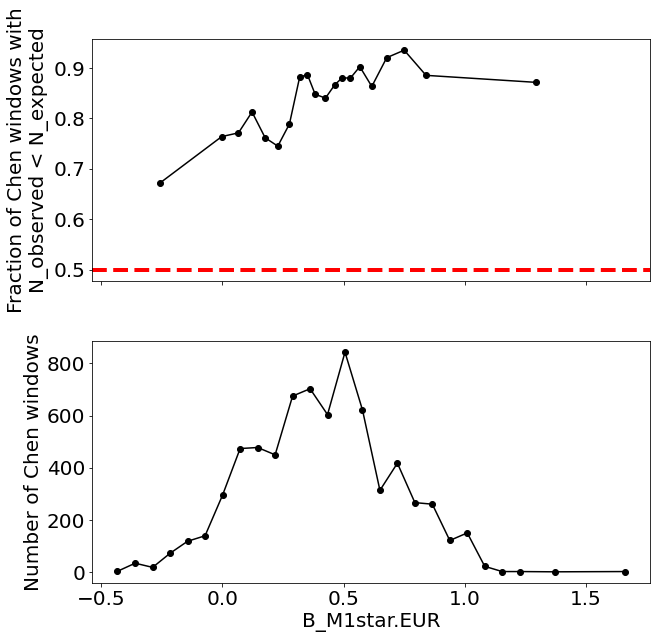

In [15]:
plot_fraction_below_diag(get_high_GC_content_windows(WINDOWS), feature='B_M1star.EUR')  

In [25]:
def get_gBGC_windows(df): 
  df = df[df['B_M1star.EUR'] > 1]
  df = df[df['window overlaps enhancer'] == False]
  df = df[df['B'] > 0.9]
  return df 

get_gBGC_windows(WINDOWS)

,chrom,start,end,gnocchi,N_expected,N_observed,window overlaps enhancer,window overlaps merged_exon,B,paternal_recombination_rate,maternal_recombination_rate,gBGC-tract_overlap_count,log10_paternal_recombination_rate,log10_maternal_recombination_rate,B_M1star.EUR,B0_M3starHMT6.EUR,B1_M3starHMT6.EUR,Bmean_M3starHMT6.EUR,lambda_M3starHMT6.EUR,GC_content_1000bp
89899,chr10,17919000,17920000,-0.307701,196.684669,201,False,False,0.919,0.000077,0.000318,0,-4.114136,-3.497582,1.059162,0.865789,12.016873,1.327444,1.810755,0.395604
89900,chr10,17929000,17930000,-1.252714,207.935893,226,False,False,0.918,0.000051,0.000209,0,-4.295638,-3.680605,1.059162,0.865789,12.016873,1.327444,1.810755,0.414585
89901,chr10,17931000,17932000,-0.290464,198.903495,203,False,False,0.918,0.000051,0.000209,0,-4.295638,-3.680605,1.059162,0.865789,12.016873,1.327444,1.810755,0.457542
89902,chr10,17932000,17933000,-1.705328,195.175673,219,False,False,0.918,0.000051,0.000209,0,-4.295638,-3.680605,1.059162,0.865789,12.016873,1.327444,1.810755,0.427572
89903,chr10,17934000,17935000,-1.557314,181.991192,203,False,False,0.917,0.113251,0.714333,0,-0.945957,-0.146099,1.059162,0.865789,12.016873,1.327444,1.810755,0.401598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986766,chr9,22984000,22985000,-1.331414,244.194369,265,False,False,0.952,0.373842,1.922240,0,-0.427312,0.283808,1.011790,0.734155,24.792697,1.840848,1.763768,0.359640
986767,chr9,22987000,22988000,-0.687381,242.300232,253,False,False,0.950,0.419956,3.093792,0,-0.376796,0.490491,1.011790,0.734155,24.792697,1.840848,1.763768,0.363636
986768,chr9,22993000,22994000,-2.064497,250.335544,283,False,False,0.953,3.970926,15.405728,0,0.598892,1.187682,1.011790,0.734155,24.792697,1.840848,1.763768,0.348651
986769,chr9,22995000,22996000,-2.579337,235.423872,275,False,False,0.952,0.773266,3.165133,0,-0.111671,0.500392,1.011790,0.734155,24.792697,1.840848,1.763768,0.315684


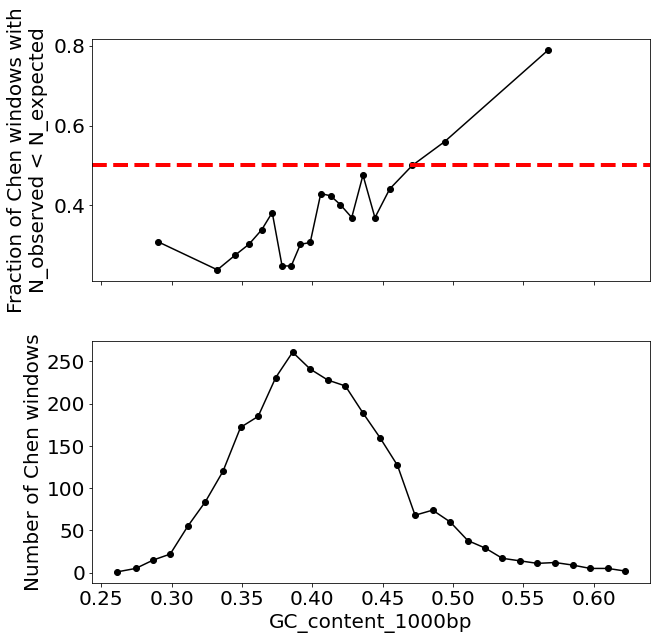

In [26]:
plot_fraction_below_diag(get_gBGC_windows(WINDOWS), feature='GC_content_1000bp')  

In [37]:
def get_gBGC_free_windows(df): 
  df = df[
    # (df['B_M1star.EUR'] > -0.1) & 
    (df['B_M1star.EUR'] < -0.25)
  ]
  df = df[df['window overlaps enhancer'] == False]
  df = df[df['B'] > 0.9]
  return df 

get_gBGC_free_windows(WINDOWS)

,chrom,start,end,gnocchi,N_expected,N_observed,window overlaps enhancer,window overlaps merged_exon,B,paternal_recombination_rate,maternal_recombination_rate,gBGC-tract_overlap_count,log10_paternal_recombination_rate,log10_maternal_recombination_rate,B_M1star.EUR,B0_M3starHMT6.EUR,B1_M3starHMT6.EUR,Bmean_M3starHMT6.EUR,lambda_M3starHMT6.EUR,GC_content_1000bp
12674,chr1,39727000,39728000,1.013234,188.926968,175,False,False,0.904,0.000009,0.000102,0,-5.044015,-3.993354,-0.448096,-0.188216,-6.344509,-0.600687,2.008952,0.418581
12675,chr1,39728000,39729000,-0.257784,216.209528,220,False,False,0.906,0.000018,0.000203,0,-4.744803,-3.691442,-0.448096,-0.188216,-6.344509,-0.600687,2.008952,0.524476
12676,chr1,39729000,39730000,1.749055,194.385720,170,False,False,0.906,0.605948,5.634874,0,-0.217565,0.750884,-0.448096,-0.188216,-6.344509,-0.600687,2.008952,0.437562
39828,chr1,107702000,107703000,1.718772,199.262230,175,False,False,0.906,3.772796,2.202498,0,0.576663,0.342915,-0.256439,-0.191742,-6.093362,-0.384725,1.770612,0.382617
39929,chr1,107869000,107870000,-0.744807,175.143108,185,False,False,0.909,0.001612,0.001369,0,-2.792664,-2.863593,-0.256439,-0.191742,-6.093362,-0.384725,1.770612,0.367632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948181,chr8,74134000,74135000,-0.656380,192.884020,202,False,False,0.908,0.000059,0.000556,0,-4.230016,-3.255071,-0.427976,-0.243332,-5.313686,-0.497356,1.792009,0.367632
948182,chr8,74135000,74136000,-1.332628,180.115196,198,False,False,0.909,0.000059,0.000556,0,-4.230016,-3.255071,-0.427976,-0.243332,-5.313686,-0.497356,1.792009,0.351648
948183,chr8,74136000,74137000,0.485254,205.964092,199,False,False,0.910,0.739882,1.885522,0,-0.130838,0.275432,-0.427976,-0.243332,-5.313686,-0.497356,1.792009,0.423576
948333,chr8,74534000,74535000,0.304535,177.052174,173,False,False,0.902,4.247958,16.515192,0,0.628180,1.217884,-0.427976,-0.243332,-5.313686,-0.497356,1.792009,0.357642


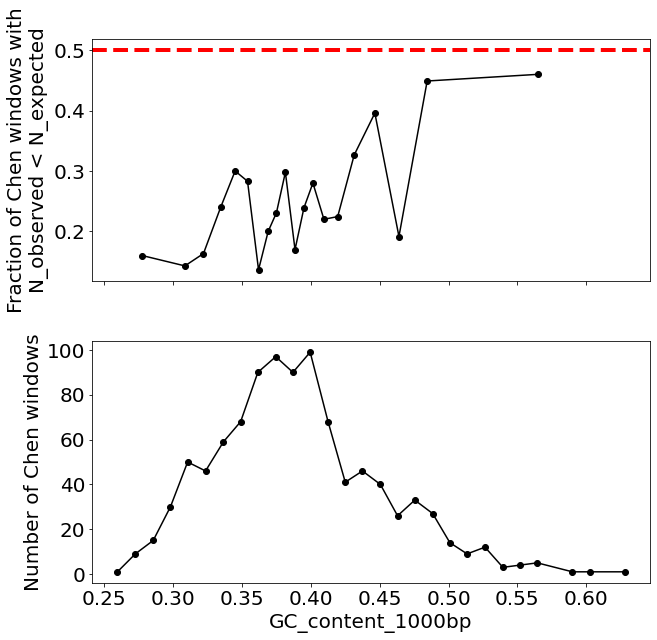

In [38]:
plot_fraction_below_diag(get_gBGC_free_windows(WINDOWS), feature='GC_content_1000bp')  